In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
plt.style.use('fivethirtyeight')

In [7]:
data = pd.read_csv(r"C:\Users\anugr\Desktop\Employee Promotion Prediction Using IBM Watson Studio Machine Learning\Dataset\emp_promotion.csv")

In [8]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [9]:
data['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [53]:
data.shape

(52397, 10)

In [52]:
data.describe(include='all')

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000,52397.000000
mean,4.946352,2.269481,1.256217,34.980457,3.313529,5.773479,0.356814,0.023169,63.627421,0.086723
std,2.499462,0.477066,0.613475,7.619030,1.215260,3.748939,0.479064,0.150442,13.298107,0.281431
min,0.000000,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,4.000000,2.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,5.000000,2.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,7.000000,3.000000,1.000000,39.000000,4.000000,8.000000,1.000000,0.000000,76.000000,0.000000
max,8.000000,3.000000,10.000000,60.000000,5.000000,15.500000,1.000000,1.000000,99.000000,1.000000


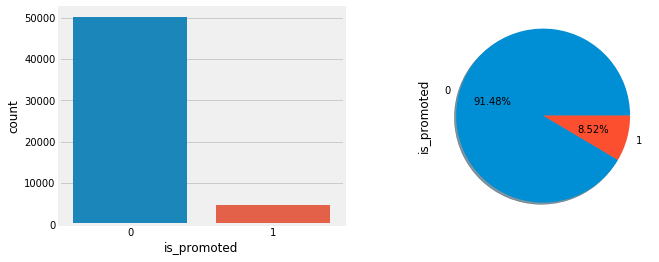

In [10]:
# Data is imbalanced

plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(data['is_promoted'])      
plt.subplot(122)
data['is_promoted'].value_counts().plot(kind='pie',autopct = '%.2f%%',shadow=True)
plt.show()

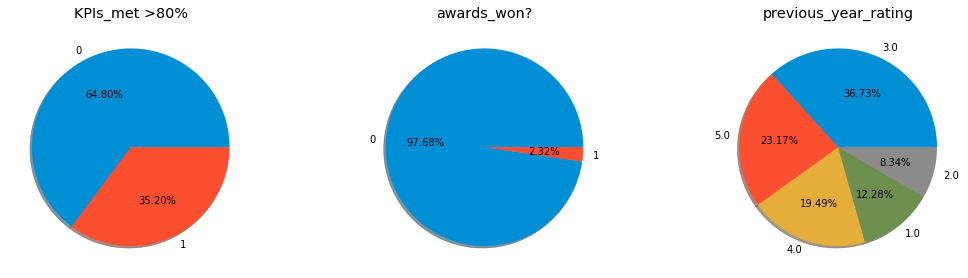

In [11]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('KPIs_met >80%')
data['KPIs_met >80%'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.subplot(232)
plt.axis('off')
plt.title('awards_won?')
data['awards_won?'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.subplot(233)
plt.axis('off')
plt.title('previous_year_rating')
data['previous_year_rating'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.show()

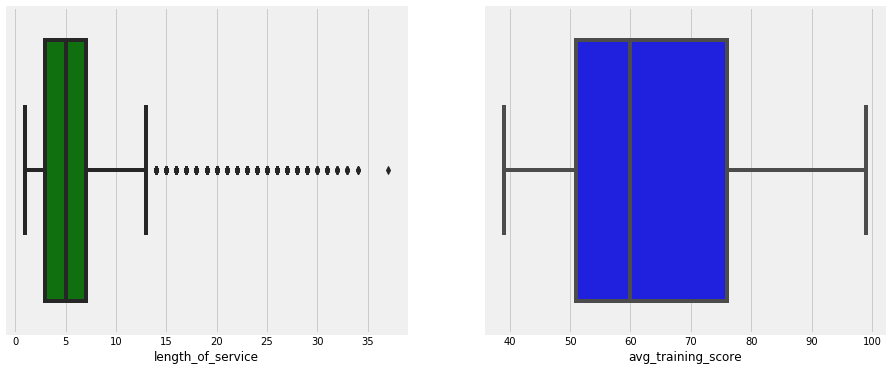

In [12]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.boxplot(data['length_of_service'],color='g')
plt.subplot(122)
sns.boxplot(data['avg_training_score'],color='b')

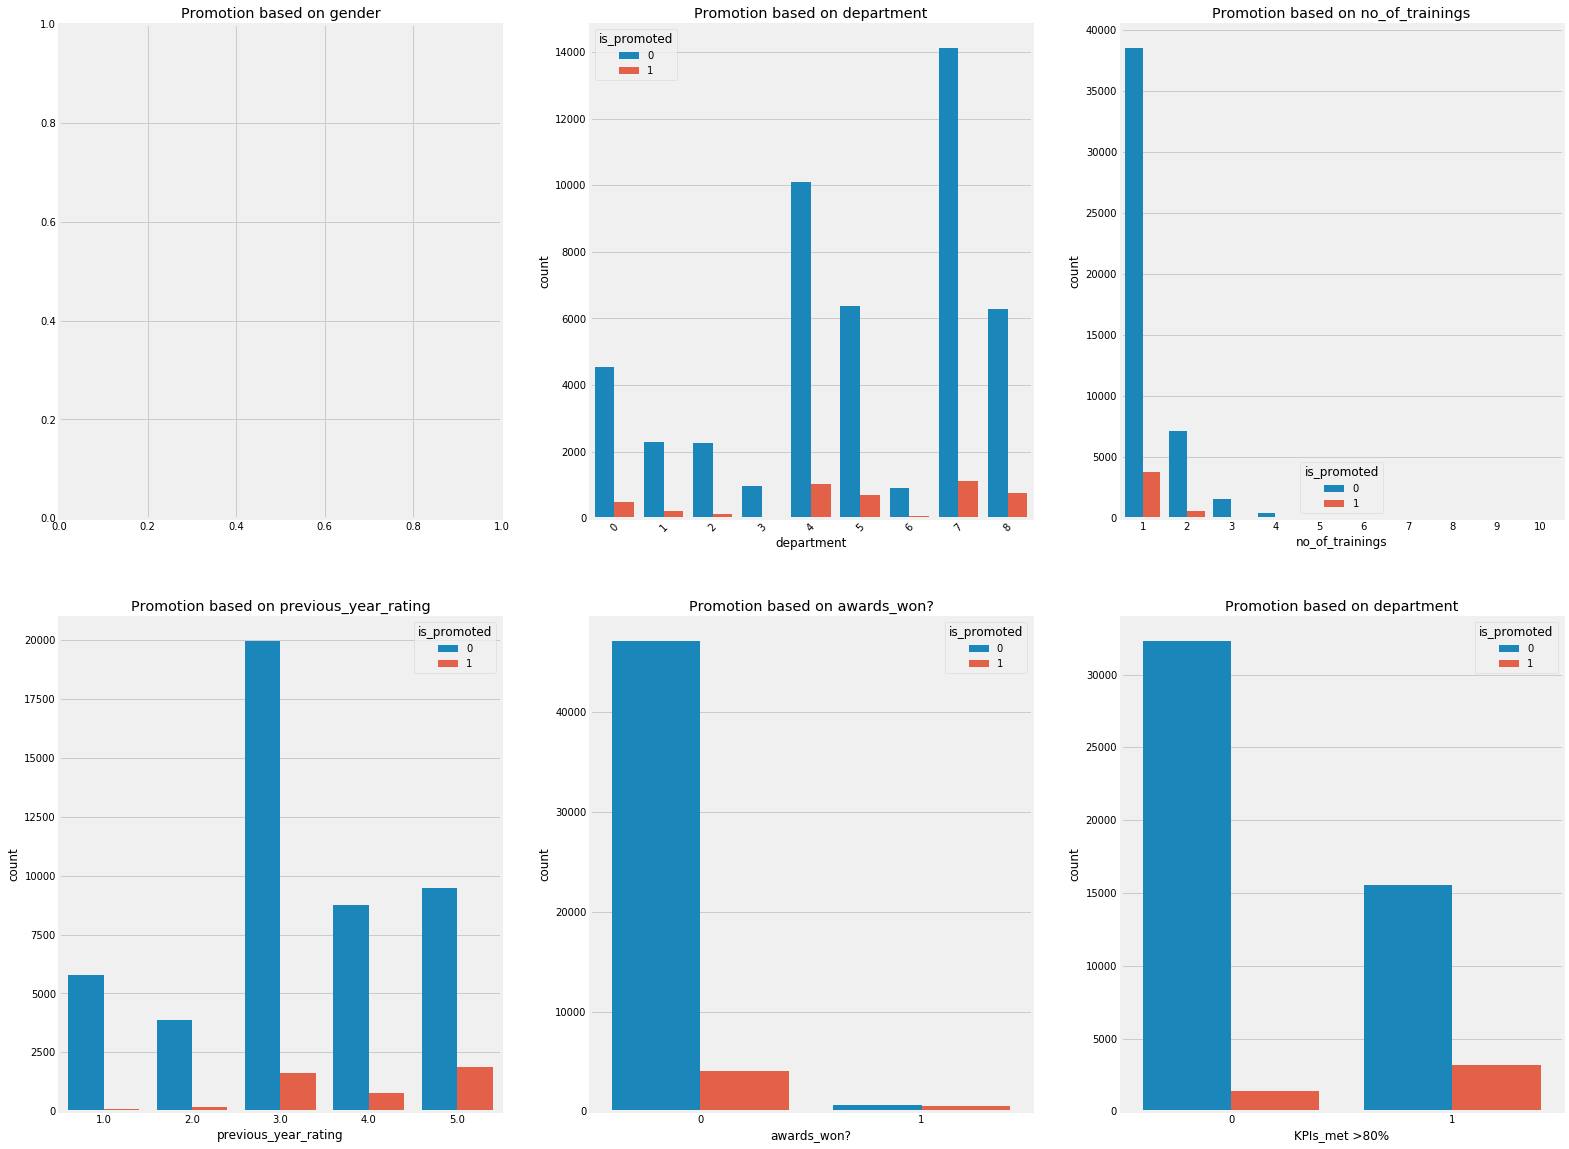

In [51]:
plt.figure(figsize=(24,20))
plt.subplot(231)
#sns.countplot(data['gender'],hue=data['is_promoted'])
plt.title('Promotion based on gender')
plt.subplot(232)
plt.xticks(rotation=45)
sns.countplot(data['department'],hue=data['is_promoted'])
plt.title('Promotion based on department')
plt.subplot(233)
sns.countplot(data['no_of_trainings'],hue=data['is_promoted'])
plt.title('Promotion based on no_of_trainings')
plt.subplot(234)
sns.countplot(data['previous_year_rating'],hue=data['is_promoted'])
plt.title('Promotion based on previous_year_rating')
plt.subplot(235)
sns.countplot(data['awards_won?'],hue=data['is_promoted'])
plt.title('Promotion based on awards_won?')
plt.subplot(236)
sns.countplot(data['KPIs_met >80%'],hue=data['is_promoted'])
plt.title('Promotion based on department')
plt.show()

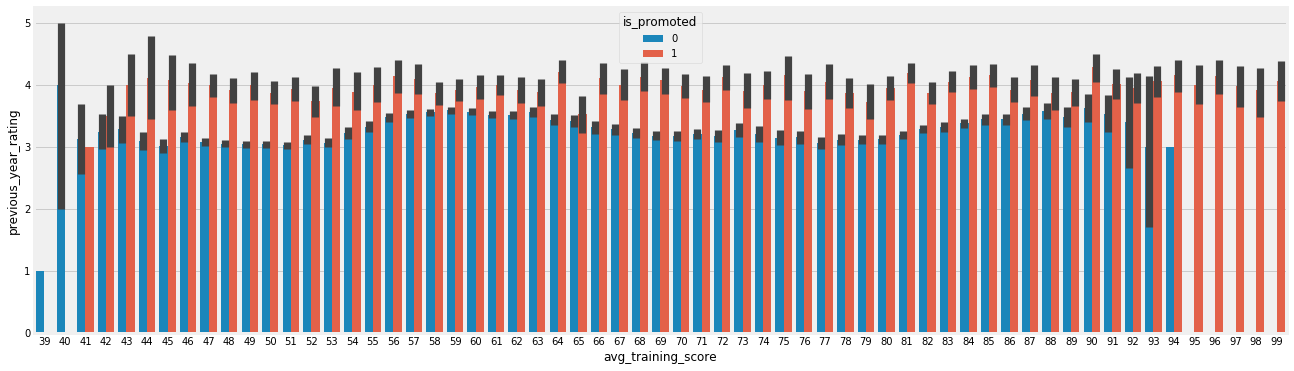

In [13]:
plt.figure(figsize=(20,6))
sns.barplot(data['avg_training_score'],data['previous_year_rating'],data['is_promoted'])

#### Drop Unwanted Stuff

In [14]:
data.drop(['employee_id','gender','region','recruitment_channel'],axis=1,inplace=True)

In [50]:
data

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,7,3,1,35,5.0,8.0,1,0,49,0
1,4,2,1,30,5.0,4.0,0,0,60,0
2,7,2,1,34,3.0,7.0,0,0,50,0
3,7,2,2,39,1.0,10.0,0,0,50,0
4,8,2,1,45,3.0,2.0,0,0,73,0
5,0,2,2,31,3.0,7.0,0,0,85,0
6,4,2,1,31,3.0,5.0,0,0,59,0
7,4,3,1,33,3.0,6.0,0,0,63,0
8,0,2,1,28,4.0,5.0,0,0,83,0
9,7,3,1,32,5.0,5.0,1,0,54,0


#### Checking for null

In [15]:
data.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [16]:
print(data["education"].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [17]:
mv=data[data["education"].isnull()].index.tolist()
data.drop(mv, axis=0, inplace=True)

In [18]:
data.isnull().sum()

department                 0
education                  0
no_of_trainings            0
age                        0
previous_year_rating    3739
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [19]:
print(data["previous_year_rating"].value_counts())

3.0    17867
5.0    11362
4.0     9509
1.0     5887
2.0     4035
Name: previous_year_rating, dtype: int64


In [20]:
data["previous_year_rating"]=data["previous_year_rating"].fillna(data["previous_year_rating"].mode()[0])

In [21]:
negative=data[(data['KPIs_met >80%']==0) & (data['awards_won?']==0) & (data['previous_year_rating']==1.0) & (data['is_promoted']==1) & (data['avg_training_score']<60)]

In [22]:
negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


In [23]:
data.drop(index=[31860,51374],inplace=True)

In [24]:
q1=np.quantile(data["length_of_service"],0.25)
q3=np.quantile(data["length_of_service"],0.75)

IQR= q3-q1

ub=(1.5*IQR)+q3
lb=(1.5*IQR)-q1


In [25]:
print("q1" ,q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper bound :',ub)
print('Lower bound :',lb)
print ('skewed data : ',len(data[data[ 'length_of_service' ]>ub]))

q1 3.0
q3 : 8.0
IQR : 5.0
Upper bound : 15.5
Lower bound : 4.5
skewed data :  2298


In [26]:
print ('skewed data : ',len(data[data[ 'length_of_service' ]>ub]))

skewed data :  2298


In [27]:
pd.crosstab([data['length_of_service']>ub],data['is_promoted'])

is_promoted,0,1
length_of_service,,
False,45716,4383
True,2137,161


In [28]:
data['length_of_service']=[ub if x>ub else x for x in data['length_of_service']]

In [29]:
data[ 'education' ].isnull()


0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
30       False
31       False
         ...  
54777    False
54778    False
54779    False
54780    False
54781    False
54782    False
54783    False
54784    False
54785    False
54786    False
54787    False
54788    False
54789    False
54790    False
54791    False
54792    False
54793    False
54794    False
54795    False
54796    False
54797    False
54798    False
54799    False
54800    False
54801    False
54802    False
54803    False
54804    False
54805    False
54807    False
Name: education, Length: 52397, dtype: bool

In [30]:
data['education']=data['education'].replace(("Below Secondary", "Bachelor's","Master's & above"),(1,2,3))

In [31]:
data[ 'education' ]

0        3
1        2
2        2
3        2
4        2
5        2
6        2
7        3
8        2
9        3
11       2
12       2
13       3
14       3
15       2
16       2
17       2
18       2
19       2
20       2
22       2
23       2
24       3
25       2
26       2
27       2
28       2
29       2
30       2
31       2
        ..
54777    2
54778    2
54779    2
54780    2
54781    2
54782    1
54783    1
54784    2
54785    2
54786    2
54787    2
54788    2
54789    3
54790    2
54791    2
54792    2
54793    2
54794    2
54795    3
54796    3
54797    2
54798    3
54799    3
54800    2
54801    2
54802    2
54803    2
54804    3
54805    2
54807    2
Name: education, Length: 52397, dtype: int64

In [32]:
lb = LabelEncoder()
data['department']=lb.fit_transform(data['department'])

##### spliting and resampling

In [33]:
x=data.drop('is_promoted',axis=1)
y = data['is_promoted']
print(x.shape)
print(y.shape)

(52397, 9)
(52397,)


In [34]:
x

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,3,1,35,5.0,8.0,1,0,49
1,4,2,1,30,5.0,4.0,0,0,60
2,7,2,1,34,3.0,7.0,0,0,50
3,7,2,2,39,1.0,10.0,0,0,50
4,8,2,1,45,3.0,2.0,0,0,73
5,0,2,2,31,3.0,7.0,0,0,85
6,4,2,1,31,3.0,5.0,0,0,59
7,4,3,1,33,3.0,6.0,0,0,63
8,0,2,1,28,4.0,5.0,0,0,83
9,7,3,1,32,5.0,5.0,1,0,54


In [35]:
sm=SMOTE()
x_resample,y_resample=sm.fit_resample(x,y)

Text(0.5, 1.0, 'After oversampling')

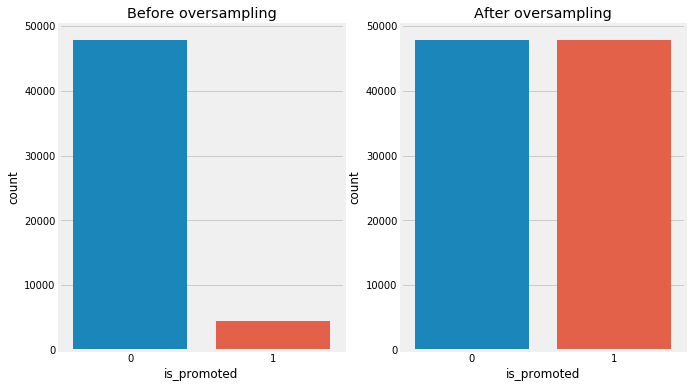

In [36]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(y)
plt.title('Before oversampling')
plt.subplot(122)
sns.countplot(y_resample)
plt.title('After oversampling')

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_resample,y_resample,test_size=0.3,random_state=10)

In [39]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))


Shape of x_train (66994, 9)
Shape of y_train (66994,)
Shape of x_test (28712, 9)
Shape of y_test (28712,)


In [40]:
def decisionTree(x_train, x_test, y_train, y_test):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    yPred = dt.predict(x_test)
    print('***DecisionTreeClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [41]:
def randomForest(x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier()
    rf.fit(x_train,y_train)
    yPred = rf.predict(x_test)
    print('***RandomForestClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [42]:
def KNN(x_train, x_test, y_train, y_test):
    knn = KNeighborsClassifier()
    knn.fit(x_train,y_train)
    yPred = knn.predict(x_test)
    print('***KNeighborsClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [43]:
def xgboost(x_train, x_test, y_train, y_test):
    xg = GradientBoostingClassifier()
    xg.fit(x_train,y_train)
    yPred = xg.predict(x_test)
    print('***GradientBoostingClassifier***')
    print('Confusion matrix')
    print(confusion_matrix(y_test,yPred))
    print('Classification report')
    print(classification_report(y_test,yPred))

In [44]:
def compareModel(x_train, x_test, y_train, y_test):
    decisionTree(x_train, x_test, y_train, y_test)
    print('-'*100)
    randomForest(x_train, x_test, y_train, y_test)
    print('-'*100)
    KNN(x_train, x_test, y_train, y_test)
    print('-'*100)
    xgboost(x_train, x_test, y_train, y_test)

In [49]:
compareModel(x_train, x_test, y_train, y_test)

***DecisionTreeClassifier***
Confusion matrix
[[13095  1217]
 [  868 13532]]
Classification report
              precision    recall  f1-score   support

           0       0.94      0.91      0.93     14312
           1       0.92      0.94      0.93     14400

    accuracy                           0.93     28712
   macro avg       0.93      0.93      0.93     28712
weighted avg       0.93      0.93      0.93     28712

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[13462   850]
 [  735 13665]]
Classification report
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14312
           1       0.94      0.95      0.95     14400

    accuracy                           0.94     28712
   macro avg       0.94      0.94      0.94     28712
weighted avg       0.94      0.94      0.94     28712

-----------------------------------------------

In [45]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

In [46]:
cv=cross_val_score(rf,x_resample,y_resample,cv=5)

In [47]:
cv
np.mean(cv)

0.9458451804774768

In [48]:
pickle.dump(rf,open('model.pkl','wb'))